In [40]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [42]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

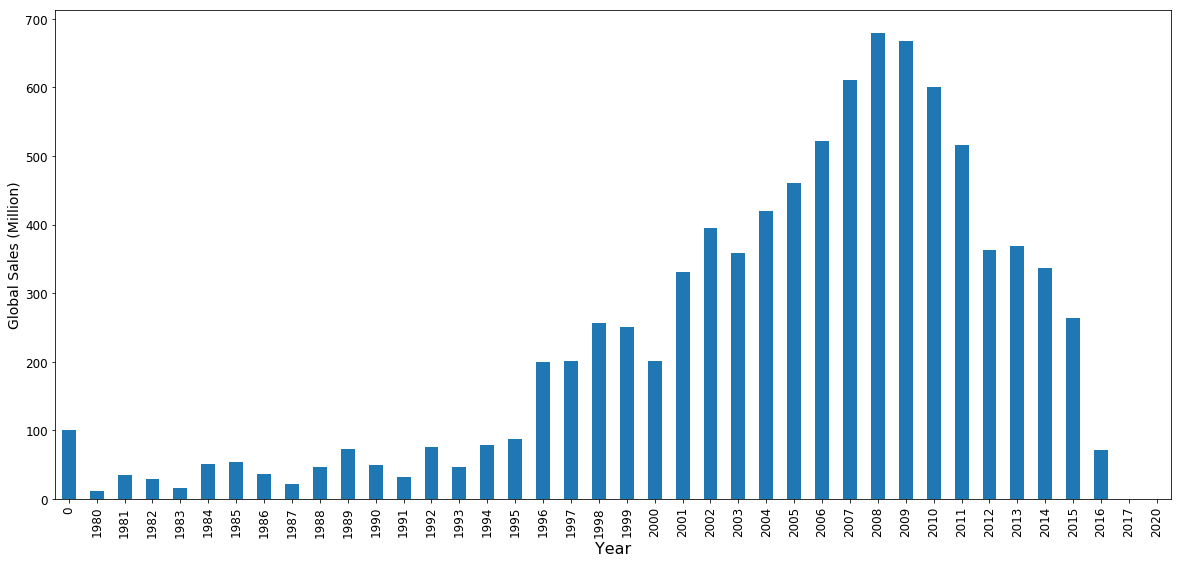

In [46]:
df['Year']=df['Year'].fillna(0).astype(int)
ax=df.groupby('Year')['Global_Sales'].sum().plot.bar(figsize=(20,9));
ax.set_xlabel("Year",size=16);
ax.set_ylabel("Global Sales (Million)",size=14);

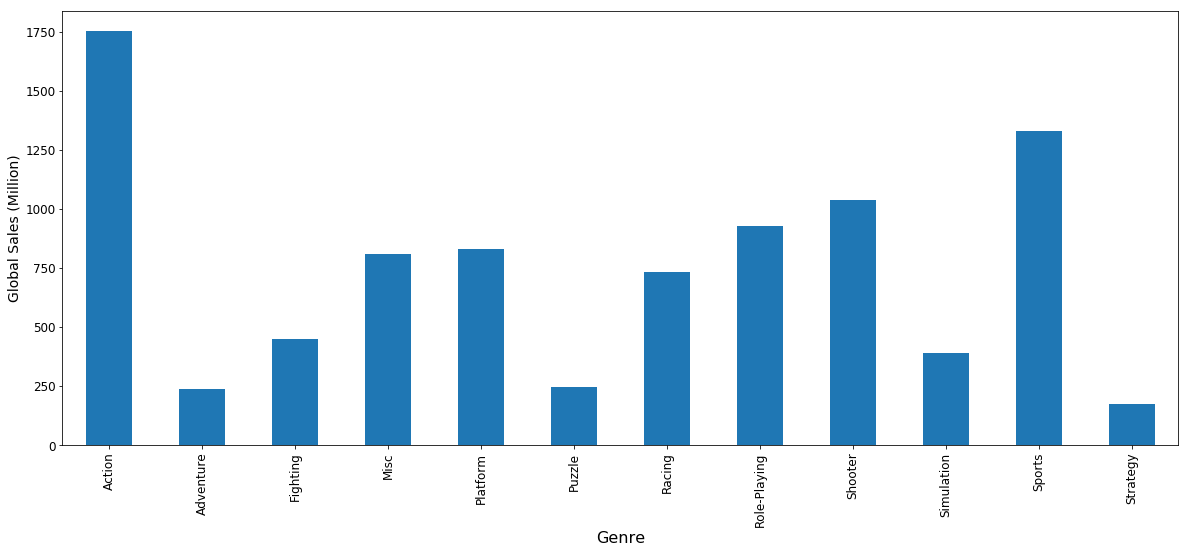

In [45]:
gen=df.groupby('Genre')['Global_Sales'].sum().plot.bar(figsize=(20,8));
gen.set_xlabel("Genre",size=16);
gen.set_ylabel("Global Sales (Million)",size=14);

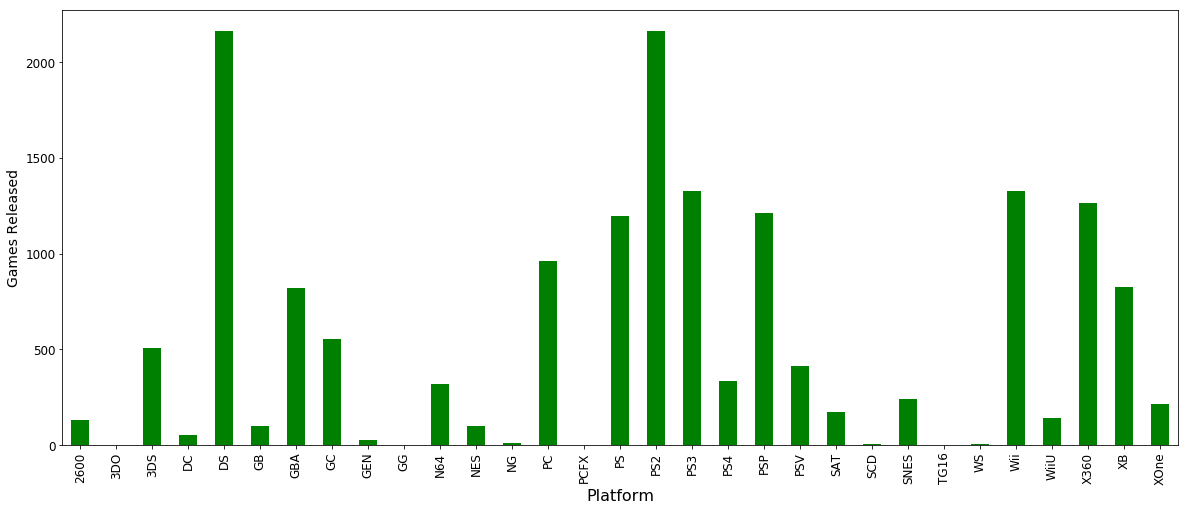

In [65]:
plat=df.groupby('Platform')['Name'].count().plot.bar(figsize=(20,8),color='Green');
plat.set_xlabel("Platform",size=16);
plat.set_ylabel("Games Released",size=14);

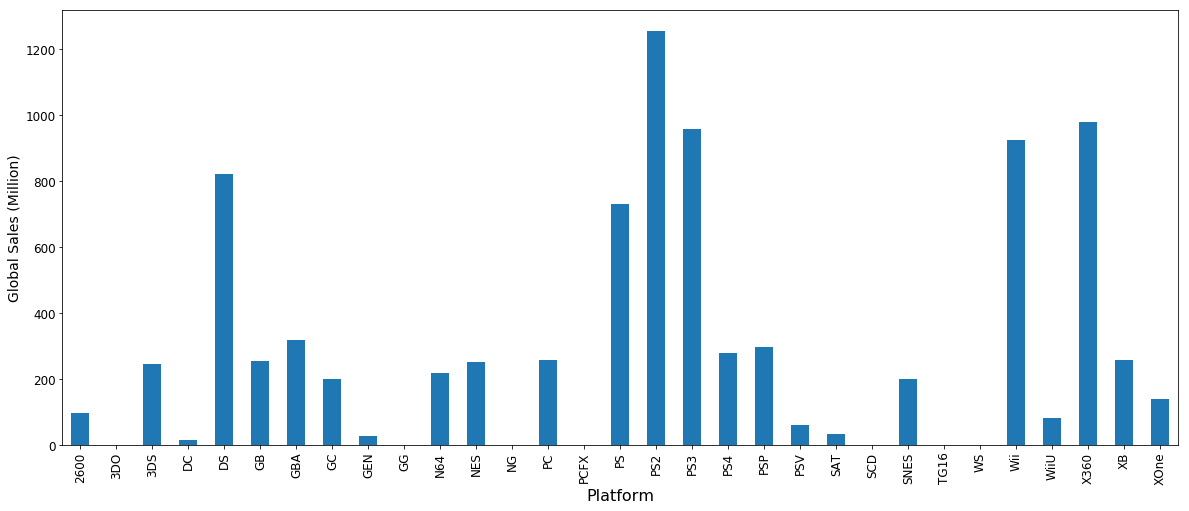

In [62]:
plat=df.groupby('Platform')['Global_Sales'].sum().plot.bar(figsize=(20,8));
plat.set_xlabel("Platform",size=16);
plat.set_ylabel("Global Sales (Million)",size=14);

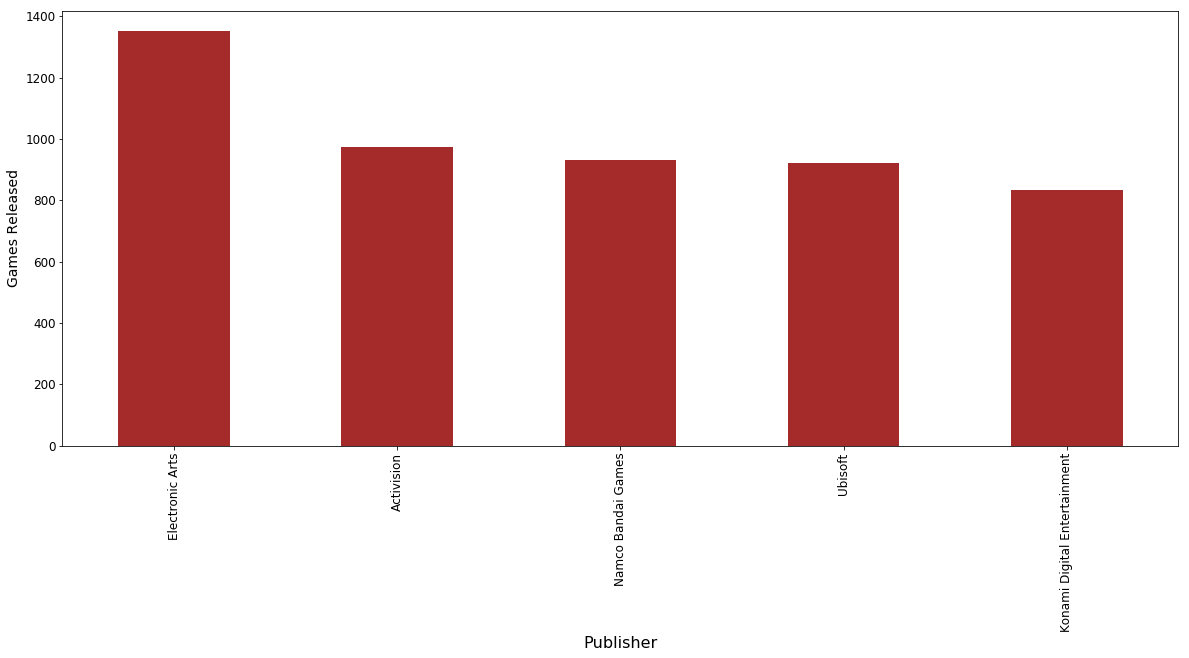

In [60]:
plat=df.groupby('Publisher')['Name'].count().nlargest(5).plot.bar(figsize=(20,8),color='Brown');
plat.set_xlabel("Publisher",size=16);
plat.set_ylabel("Games Released",size=14);

In [63]:
df[df['Publisher']=='Electronic Arts']['Genre'].value_counts(normalize=True)

Sports          0.415248
Action          0.135455
Racing          0.117691
Shooter         0.102887
Simulation      0.085862
Misc            0.034049
Fighting        0.028868
Strategy        0.027387
Role-Playing    0.025907
Platform        0.011843
Adventure       0.009623
Puzzle          0.005181
Name: Genre, dtype: float64